# Importing Libraries 

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
import statsmodels.api as sm
import itertools

from pylab import rcParams

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'



# Importing Data

In [7]:
train_data= pd.read_csv("train_users_2.csv")


# Data Exploration and Wrangling

In [8]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

From the data we can see that columns like date_account_created, timestamp_first_active and date_first_booking are not in the date format. These will be converted to the date format.

In [10]:
train_data['date_account_created'] = pd.to_datetime(train_data['date_account_created'])
train_data['date_first_booking'] = pd.to_datetime(train_data['date_first_booking'])
train_data['timestamp_first_active'] = pd.to_datetime(train_data['timestamp_first_active'], format='%Y%m%d%H%M%S')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

# Dealing with null values and outliers

In [11]:
train_data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [12]:
train_data.isnull().sum()/len(train_data)


id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

In [13]:
train_data.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

We deal with unreasonable values of age on both sides of the spectrum as any age less than 18 or more than 110 is implausible 

In [14]:
train_data.loc[train_data.age > 110, 'age'] = np.nan
train_data.loc[train_data.age < 18, 'age'] = np.nan

In [12]:
train_data.age.describe()

count    124502.000000
mean         37.431551
std          13.897949
min          18.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         110.000000
Name: age, dtype: float64

From this we can see the 50% of the users are below the age 34 and that avg age of a user is 37.

Filling the missing values values of age with median cause it is more robust than mean.

In [13]:
train_data.age.fillna(train_data.age.median(), inplace=True)

In [14]:
train_data.age.isnull().sum()

0

Filling the missing values of first_affiliate_tracked with mode since it is categorical data. 

In [15]:
train_data. first_affiliate_tracked.fillna(train_data. first_affiliate_tracked.mode()[0], inplace=True)

In [16]:
train_data.first_affiliate_tracked.isnull().sum()

0

Since that the date_first_booking column has more than 58% of it null. It is better to be dropped.

In [17]:
train_data.drop('date_first_booking',axis=1, inplace=True)

In [18]:
train_data.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

# Data Visualization 

In [19]:
dest= train_data['country_destination'].value_counts()

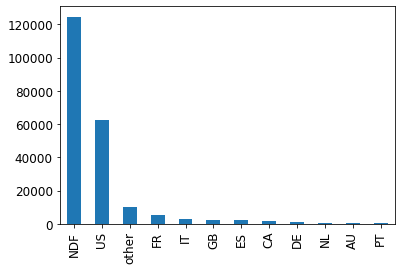

In [20]:
dest.plot(kind="bar")


We can see from the plot that most of the users didn't book since NDF has the highest count.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A92C929CD0>],
      dtype=object)

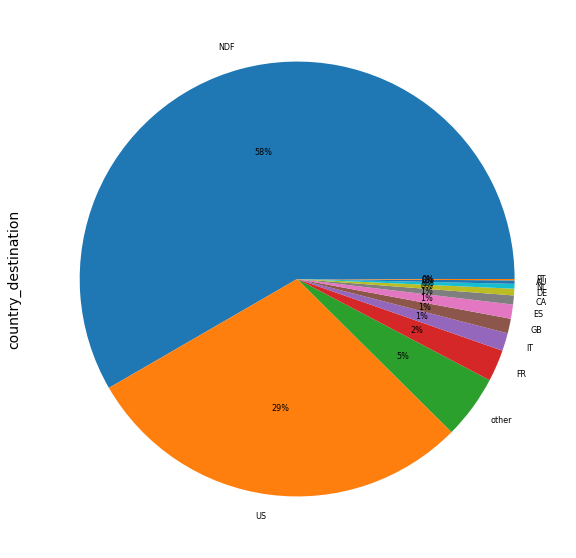

In [21]:
dest.plot(kind="pie", subplots=True, figsize=(10,10), autopct='%1.0f%%' ,fontsize=8)

More than half of the users didn't book. 58% to be exact.

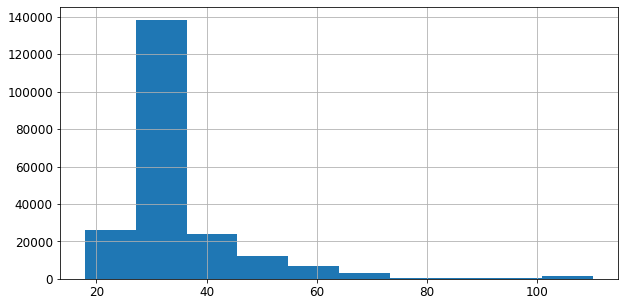

In [22]:
train_data.age.hist(figsize=(10,5))

We can see from the figure that most of the users are between the ages of 20 to 40.
Which makes sense since most of the users of technology fall into the same bracket.

In [23]:
gend= train_data['gender'].value_counts()

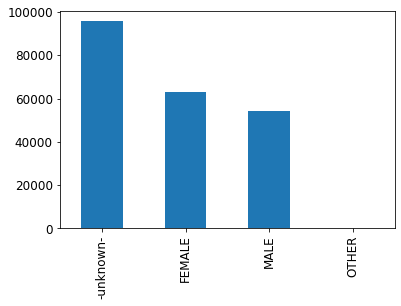

In [24]:
gend.plot(kind="bar")


As we can obsereve from this figure that most of the users do not provide their gender. But from the provided users, females  book more than males.

# Time Series Analysis

In [25]:
ts=train_data[['id','date_account_created']]
ts=ts.groupby(ts.date_account_created).count()

In [26]:
ts

,id
date_account_created,
2010-01-01,1
2010-01-02,1
2010-01-03,1
2010-01-04,3
2010-01-05,3
...,...
2014-06-26,587
2014-06-27,557
2014-06-28,461


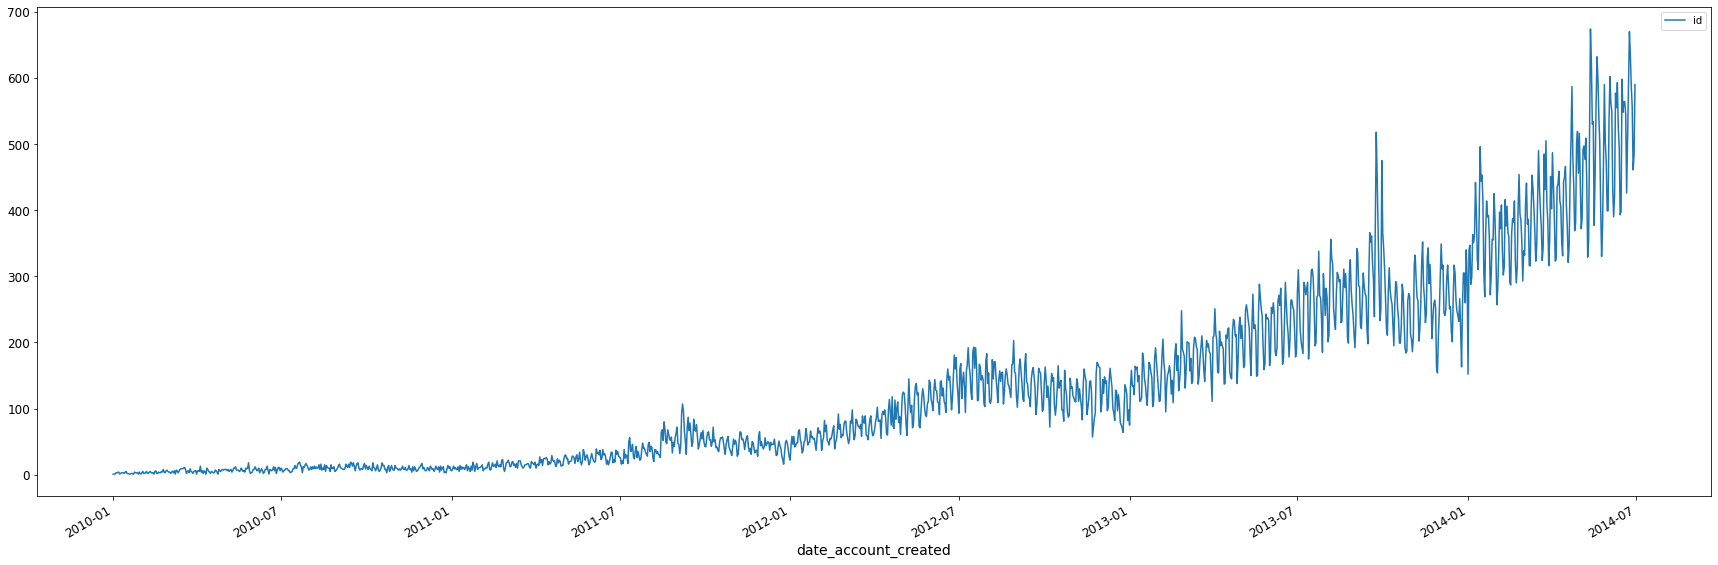

In [27]:
ts.plot.line(figsize=(30,10))

# Time Series Decomposition 

In [28]:
ts=ts.reset_index()

In [29]:
ts.date_account_created.dtype

dtype('<M8[ns]')

In [30]:
pd.to_datetime(ts['date_account_created'])

0      2010-01-01
1      2010-01-02
2      2010-01-03
3      2010-01-04
4      2010-01-05
          ...    
1629   2014-06-26
1630   2014-06-27
1631   2014-06-28
1632   2014-06-29
1633   2014-06-30
Name: date_account_created, Length: 1634, dtype: datetime64[ns]

In [31]:
ts = ts.set_index('date_account_created')
ts.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-07', '2010-01-08', '2010-01-10',
               '2010-01-11', '2010-01-12',
               ...
               '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24',
               '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-28',
               '2014-06-29', '2014-06-30'],
              dtype='datetime64[ns]', name='date_account_created', length=1634, freq=None)

In [32]:
m= ts['id'].resample('D').mean()


In [33]:
m=m.fillna(0)

In [34]:
m.isnull().sum()

0

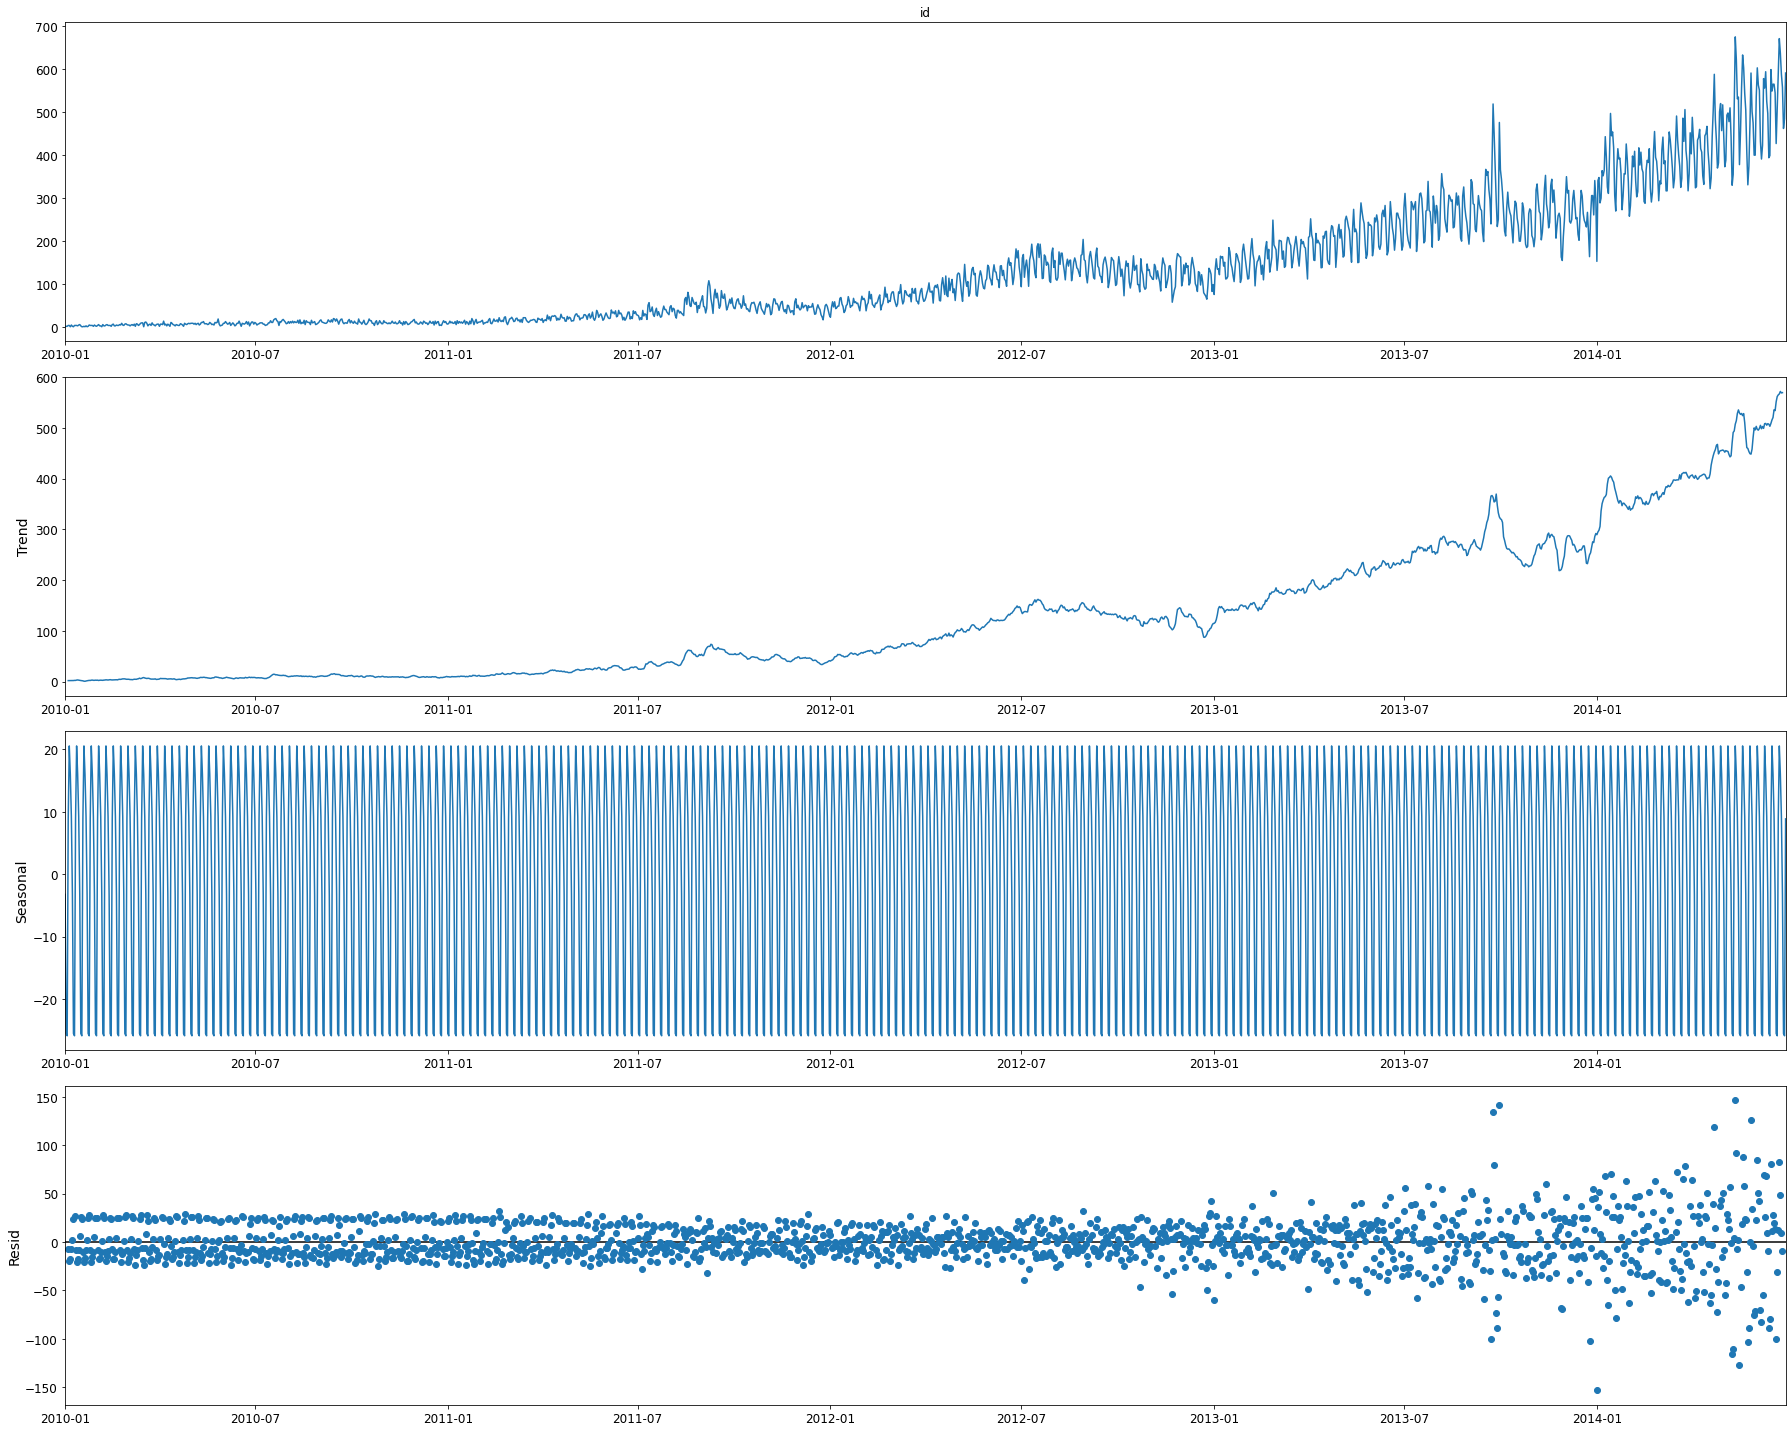

In [35]:
rcParams['figure.figsize'] = 25, 20
decomposition = sm.tsa.seasonal_decompose(m,model='additive')
fig = decomposition.plot()
plt.show()


# Time Series Forecasting

We will be using the ARIMA method for time-series forecasting.
ARIMA(p,d,q) model has three paramters these account for seasonality, trend, and noise in data.
We will use grid search to find the optimal set of paramters that will yield the best performance for our model.

In [36]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Applying the grid search.

In [37]:
bestAIC = np.inf
bestParam = None
bestSParam = None

for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(m,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                if results.aic<bestAIC:
                    bestAIC = results.aic
                    bestParam = param
                    bestSParam = param_seasonal
            
            except:
                continue
print('the best ones are:',bestAIC,bestParam,bestSParam)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:21889.175512532056
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:20031.06075093033
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:17416.529676859696
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:16766.226426773716


C:\Users\Musta\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:17427.797306262666
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:16605.102543183602
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:17131.71766813559
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:16767.555916015408
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:19942.58211698354
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:18538.494548195304
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:16717.91634766406
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:15973.840833426431
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:16726.17404475138
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:15837.751045809346
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:16367.298935207344
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:15974.404650895453
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:16133.52351035088
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:15941.182127673655
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:17382.20485671566
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:15969.221471209861
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:15991.275863607889
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:15926.58824946946

C:\Users\Musta\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:15692.430330128802
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:16266.282593797921
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:15797.527233644563
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:16130.943266144759
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:15943.153079926775
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:17373.447306898604
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:15966.775631569322
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:15981.767787863946
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:15928.165214528488
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:16844.861970566624
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:15928.962957618318
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:15781.406114388912
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:15600.614260003937
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:16918.713375209092
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:15609.8611659902
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:15653.650606726387
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:15583.632243389196
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:16808.9139264

In [38]:
mod = sm.tsa.statespace.SARIMAX(m,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1782      0.056     -3.191      0.001      -0.288      -0.069
ma.L1          0.4145      0.052      7.931      0.000       0.312       0.517
ar.S.L12      -0.4879      0.014    -34.274      0.000      -0.516      -0.460
sigma2      1917.4016     36.908     51.951      0.000    1845.063    1989.740


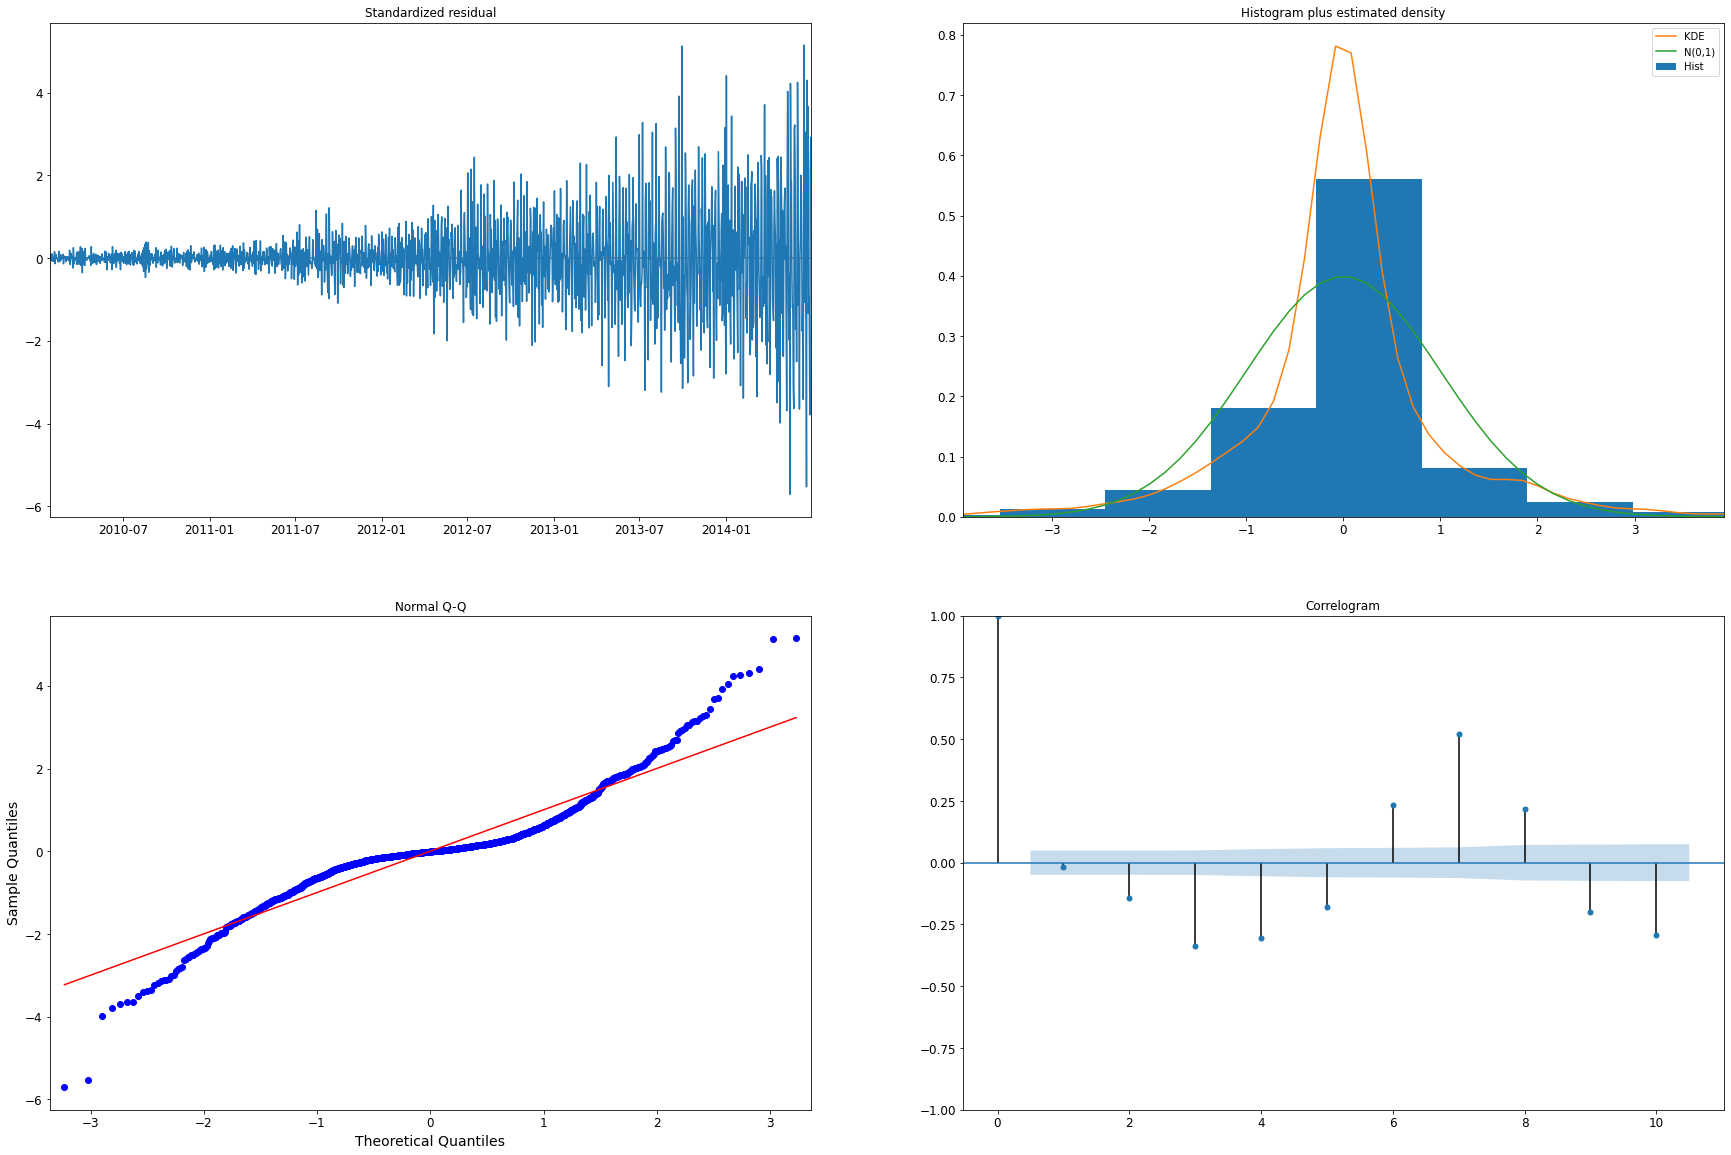

In [39]:
results.plot_diagnostics(figsize=(30, 20))
plt.show()

In [40]:
m.tail()

date_account_created
2014-06-26    587.0
2014-06-27    557.0
2014-06-28    461.0
2014-06-29    484.0
2014-06-30    590.0
Freq: D, Name: id, dtype: float64

# Validating Forecasts

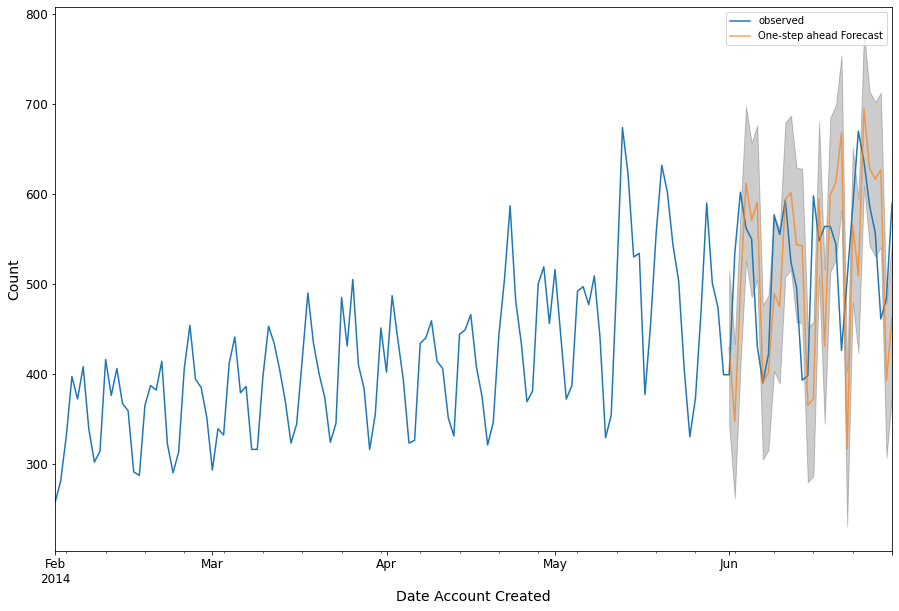

In [41]:
pred = results.get_prediction(start=pd.to_datetime('2014-06-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = m['2014-02':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(15, 10))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date Account Created')
ax.set_ylabel('Count')
plt.legend()
plt.show()

In [42]:
y_forecasted = pred.predicted_mean
y_truth = m['2014-06-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 12675.43
The Root Mean Squared Error of our forecasts is 112.59


# Producing and Visualizing Forecasts


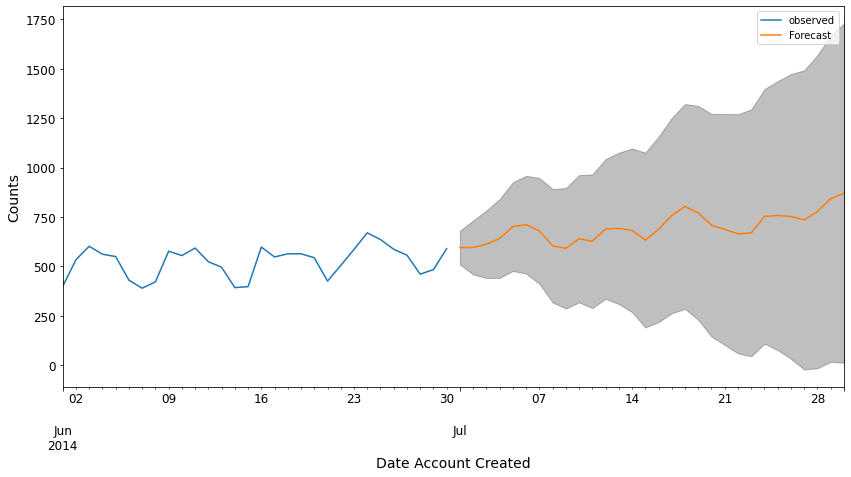

In [43]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = m['2014-06'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date Account Created')
ax.set_ylabel('Counts')
plt.legend()
plt.show()


# Machine learning model

The NDF values in country_destination is dropped since we are interested in predicting the country of destination and not whether people will book or not. We will drop the 'id', 'date_account_created' and 'timestamp_first_active' since they would not be of need in our predictions. We will also replace the '-unknown-' values in 'gender' and 'first_browser' with 'NaN'.

In [5]:
data=train_data.drop(train_data[train_data['country_destination'] == "NDF"].index)
data=data.drop(['id','date_account_created','timestamp_first_active'], axis=1)
data.gender.replace('-unknown-', np.nan, inplace=True)
data.first_browser.replace('-unknown-', np.nan, inplace=True)


In [45]:
features = ['gender', 'signup_method', 'signup_flow', 'language',
                'affiliate_channel', 'affiliate_provider',
                'first_affiliate_tracked', 'signup_app',
                'first_device_type', 'first_browser']

data = pd.get_dummies(data,columns=features)

In [46]:
x= data
y= data['country_destination']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

# Random Forest 

In [48]:
clf = RandomForestClassifier()

In [49]:
clf.fit(x_train.iloc[:,x_train.columns != "country_destination"],y_train)


RandomForestClassifier()

In [50]:
preds = clf.predict(x_test.iloc[:,x_test.columns != "country_destination"])

In [51]:
x_test['predicted_country'] = preds

<ipython-input-51-22f33dda05f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['predicted_country'] = preds


In [52]:
accuracy_score(x_test['country_destination'],x_test['predicted_country'])

0.648146065309489

# Feature Selection

We realize that the accuracy of the model isn't the best. A good way to increase accuracy and make the model simpler is by using feature selection. We choose the features with the highest importance.

In [53]:
featureImportance = pd.DataFrame(clf.feature_importances_,data.columns[data.columns != 'country_destination'],columns=['feature_importance']).sort_values(["feature_importance"],ascending=False)
featureImportance.head(10)

,feature_importance
age,0.625411
gender_MALE,0.027887
gender_FEMALE,0.026419
first_affiliate_tracked_untracked,0.018636
first_affiliate_tracked_linked,0.016834
signup_method_basic,0.015208
signup_method_facebook,0.015139
first_browser_Chrome,0.014108
first_browser_Firefox,0.013577
first_affiliate_tracked_omg,0.012920


In [61]:
RF=[]
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(data.loc[:,list(featureImportance[:i].index)],data['country_destination'],test_size=0.3,random_state=1)
    clf = RandomForestClassifier()
    clf.fit(x_train,y_train)
    preds = clf.predict(x_test)
    rf = accuracy_score(y_test,preds)
    RF.append[rf]

In [55]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [56]:
accuracy_score(y_test,preds)

0.6959847036328872

A 5.3% increase in accuracy and a much simpler model.

# Bernoulli Naive Bayes

In [57]:
clf = BernoulliNB()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [58]:
accuracy_score(y_test,preds)

0.7032954673265099

# Multilayer perceptron 

In [59]:
clf = MLPClassifier()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [60]:
accuracy_score(y_test,preds)

0.7032954673265099